# How to run this notebook

In order to run this notebook using Poetry, you first need to create a kernel that uses the virtualenv that you use for SeaGOAT development.

In order to do that, you can run the following commands:

```bash
poetry run python -m ipykernel install --user --name seagoat-poetry
jupyter labextension install @jupyter-widgets/jupyterlab-manager
```

In [93]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [94]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from IPython.core.getipython import get_ipython

In [95]:
from load_results import load_results
from load_results import get_percentage_of_queries_with_correct_results
from load_results import get_percentage_of_examples_with_correct_results
from load_results import get_positions_of_correct_results
from load_results import get_best_position_of_correct_results
from load_results import get_average_position_of_a_correct_results
from load_results import get_list_of_test_runs

list_of_test_runs = get_list_of_test_runs()
selected_test_run = list_of_test_runs[0]


global selected_test_run

def update_selected_test_run(change):
    global selected_test_run
    selected_test_run = change['new']
    get_ipython().run_cell_magic('javascript', '', 'IPython.notebook.execute_cells_below()')

test_run_dropdown = widgets.Dropdown(
    options=list_of_test_runs,
    description='Test run:',
)
test_run_dropdown.observe(update_selected_test_run, names='value')

# SeaGOAT query accuracy

In [96]:
display(test_run_dropdown)

Dropdown(description='Test run:', options=('initial test',), value='initial test')

In [97]:
results = load_results(selected_test_run)

## % of queries resulting in a correct result

In [98]:
get_percentage_of_queries_with_correct_results(results, "random")

0.30120481927710846

In [99]:
get_percentage_of_queries_with_correct_results(results, "seagoat")

37.148594377510044

## % of examples with at least one query resulting in a correct result

In [100]:
get_percentage_of_examples_with_correct_results(results, 'random')

2.112676056338028

In [101]:
get_percentage_of_examples_with_correct_results(results, 'seagoat')

76.05633802816901

## Position of correct result when a correct result is found

(array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1.]),
 array([ 6.  ,  7.15,  8.3 ,  9.45, 10.6 , 11.75, 12.9 , 14.05, 15.2 ,
        16.35, 17.5 , 18.65, 19.8 , 20.95, 22.1 , 23.25, 24.4 , 25.55,
        26.7 , 27.85, 29.  ]),
 <BarContainer object of 20 artists>)

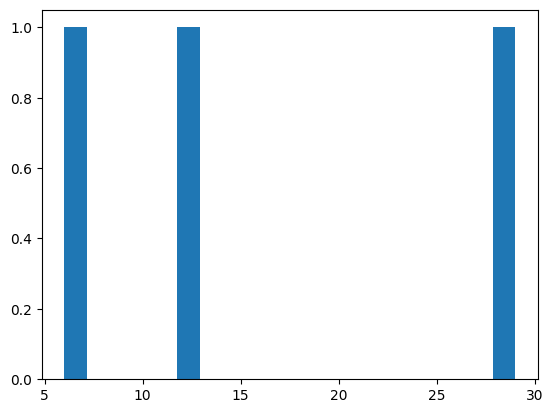

In [102]:
plt.hist(get_positions_of_correct_results(results, 'random'), 20)

(array([87., 95., 68., 24., 19., 14.,  2., 15.,  7., 13.,  1.,  5.,  2.,
         1.,  0.,  7.,  0.,  5.,  0.,  5.]),
 array([  2. ,  11.4,  20.8,  30.2,  39.6,  49. ,  58.4,  67.8,  77.2,
         86.6,  96. , 105.4, 114.8, 124.2, 133.6, 143. , 152.4, 161.8,
        171.2, 180.6, 190. ]),
 <BarContainer object of 20 artists>)

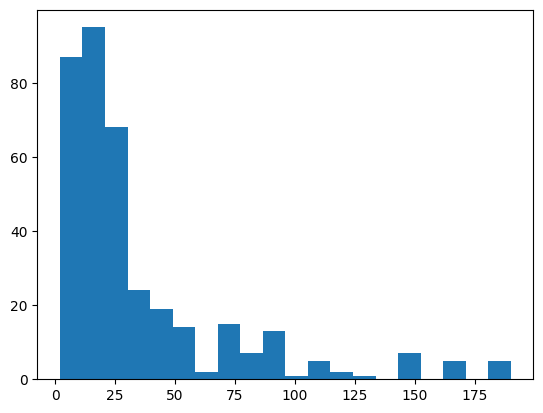

In [103]:
plt.hist(get_positions_of_correct_results(results, 'seagoat'), 20)

## Best result position for examples

(array([19., 28., 21.,  8.,  6.,  7.,  1.,  5.,  1.,  4.,  1.,  1.,  1.,
         1.,  0.,  1.,  0.,  1.,  0.,  2.]),
 array([  2. ,  11.4,  20.8,  30.2,  39.6,  49. ,  58.4,  67.8,  77.2,
         86.6,  96. , 105.4, 114.8, 124.2, 133.6, 143. , 152.4, 161.8,
        171.2, 180.6, 190. ]),
 <BarContainer object of 20 artists>)

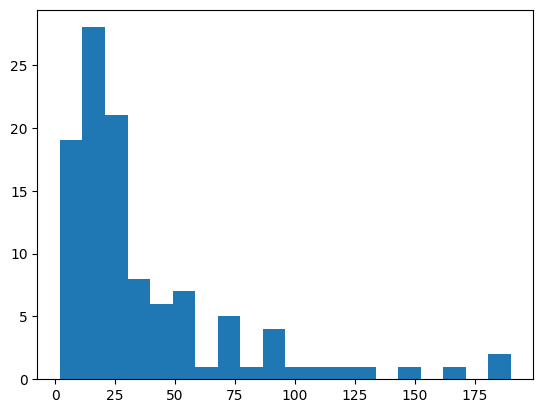

In [104]:
plt.hist(get_best_position_of_correct_results(results, 'seagoat'), 20)

## Average position of correct results

In [105]:
get_average_position_of_a_correct_results(results, 'seagoat')

35.351351351351354